In [3]:
import pypianoroll
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import io
import mido
import symusic

In [4]:
midifolder = '../data/giantmidi_small/'
midifiles = os.listdir(midifolder)
test_file = midifiles[0]
print(test_file)

Aaron, Michael, Piano Course, V8WvKK-1b2c.mid


In [5]:
main_piece = pypianoroll.read(midifolder + test_file, resolution=24)

In [31]:
main_piece_size = main_piece.downbeat.shape[0]
print(main_piece_size)
print( np.where( np.any(main_piece.downbeat, axis=0) ) )

74688
(array([0]),)


In [7]:
print(np.random.randint(-6,6))

-3


In [8]:
mido_piece = mido.MidiFile(midifolder + test_file)

In [9]:
for i in range(len(mido_piece.tracks)):
    print('track ' + str(i) + ': ' + mido_piece.tracks[i].name)

track 0: 
track 1: 


In [10]:
pr = main_piece.tracks[0].pianoroll

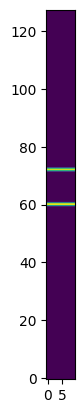

In [11]:
plt.imshow(pr[315:325,:].T, origin='lower')

In [12]:
# load twice, for melody and accompaniment, and delete complementary material
melody_piece = pypianoroll.read(midifolder + test_file, resolution=24)
accomp_piece = pypianoroll.read(midifolder + test_file, resolution=24)

mel_pr = melody_piece.tracks[0].pianoroll
acc_pr = accomp_piece.tracks[0].pianoroll

In [13]:
print(melody_piece.tracks[0].name)

In [14]:
pr = np.array(melody_piece.tracks[0].pianoroll)
running_melody = -1
i = 0
# for i in range( pr.shape[0] ):
while i < pr.shape[0]:
    # check if any note
    if np.sum(pr[i,:]) > 0:
        # get running max
        running_max = np.max( np.nonzero( pr[i,:] ) )
        if i > 87 and i < 98:
            print(i)
            print('running_max: ', running_max)
        # check if there exists a running melody
        if running_melody > -1:
            if i > 87 and i < 98:
                print(i)
                print('running_melody > -1: ', running_melody)
            # check if running melody is continued
            if running_melody == running_max:
                if i > 87 and i < 98:
                    print(i)
                    print('running_melody == running_max: ', running_max)
                # remove all lower pitches from melody
                mel_pr[i, :running_max] = 0
                # remove higher pitch from accomp
                acc_pr[i, running_max] = 0
            else:
                if i > 87 and i < 98:
                    print(i)
                    print('running_melody != running_max: ', running_melody, running_max)
                # running melody may need to change
                # check if new highest pitch just started
                if running_max > running_melody:
                    # a new higher note has started
                    # finish previous note that was highest until now
                    j = 0
                    while j+i < mel_pr.shape[0] and mel_pr[i+j, running_melody] > 0 and running_max > running_melody:
                        if i > 87 and i < 98:
                            print('while: ', i, j)
                        mel_pr[i+j, :running_melody] = 0
                        mel_pr[i+j, running_melody+1:running_max] = 0
                        acc_pr[i+j, running_melody] = 0
                        acc_pr[i+j, running_max] = 0
                        if np.sum( pr[i+j,:] ) > 0:
                            running_max = np.max( np.nonzero( pr[i+j,:] ) )
                        else:
                            running_melody = -1
                            break
                        j += 1
                        # if j+i < pr.shape[0]:
                        #     if np.sum( pr[i+j,:] ) > 0:
                        #         running_max = np.max( np.nonzero( pr[i+j,:] ) )
                        #     else:
                        #         running_melody = -1
                        #         break
                    # start new running melody
                    i += j-1
                    running_melody = running_max
                else:
                    # i should be > 0 since we have that running_melody > -1
                    # a lower note has come
                    # if has begun earlier, it should be ignored
                    if pr[i-1, running_max] > 0:
                        if i > 87 and i < 98:
                            print(i)
                            print('lower max should be ignored: ', running_melody, running_max)
                        # its continuing an existing note - not part of melody
                        mel_pr[i, :] = 0
                        # running max should not be canceled, it remains as ghost max
                        # until a new higher max or a fresh lower max starts
                    else:
                        # a new fresh lower max starts that shouldn't be ignored
                        if i > 87 and i < 98:
                            print(i)
                            print('lower max should NOT be ignored: ', pr[i-1, running_max], pr[i, running_max], running_max)
                        # start new running melody
                        running_melody = running_max
                        # remove all lower pitches from melody
                        mel_pr[i, :running_max] = 0
                        # remove higher pitch from accomp
                        acc_pr[i, running_max] = 0
        else:
            # no running melody, check max conditions
            if i > 87 and i < 98:
                print(i)
                print('new note started: ', running_melody, running_max)
            # new note started - make it the running melody
            running_melody = running_max
            # remove all lower pitches from melody
            mel_pr[i, :running_max] = 0
            # remove higher pitch from accomp
            acc_pr[i, running_max] = 0
        # end if
    else:
        # there is a gap
        running_melody = -1
    # end if
    i += 1
# end for

88
running_max:  62
88
running_melody > -1:  72
88
running_melody != running_max:  72 62
88
lower max should be ignored:  72 62
89
running_max:  62
89
running_melody > -1:  72
89
running_melody != running_max:  72 62
89
lower max should be ignored:  72 62
90
running_max:  62
90
running_melody > -1:  72
90
running_melody != running_max:  72 62
90
lower max should be ignored:  72 62
91
running_max:  62
91
running_melody > -1:  72
91
running_melody != running_max:  72 62
91
lower max should be ignored:  72 62
92
running_max:  62
92
running_melody > -1:  72
92
running_melody != running_max:  72 62
92
lower max should be ignored:  72 62
93
running_max:  62
93
running_melody > -1:  72
93
running_melody != running_max:  72 62
93
lower max should be ignored:  72 62
94
running_max:  62
94
running_melody > -1:  72
94
running_melody != running_max:  72 62
94
lower max should be ignored:  72 62
95
running_max:  62
95
running_melody > -1:  72
95
running_melody != running_max:  72 62
95
lower max sh

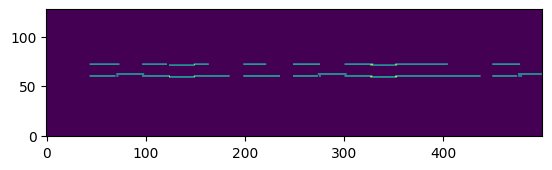

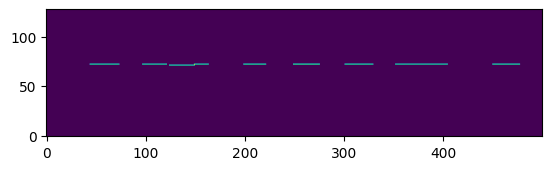

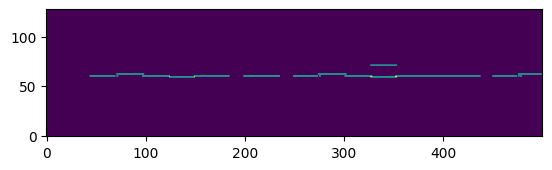

In [15]:
plt.imshow(pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(mel_pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(acc_pr[0:500,:].T, origin='lower')

In [16]:
# melody_piece.write('test_data/melody.mid')
# accomp_piece.write('test_data/accomp.mid')

In [17]:
def make_ghost_file(pianoroll_structure):
        # initialize bytes handle
        b_handle = io.BytesIO()
        # write midi data to bytes handle
        pianoroll_structure.write(b_handle)
        # start read pointer from the beginning
        b_handle.seek(0)
        # create a buffered reader to read the handle
        buffered_reader = io.BufferedReader(b_handle)
        # create a midi object from the "file", i.e., buffered reader
        midi_object = mido.MidiFile(file=buffered_reader)
        # close the bytes handle
        b_handle.close()
        return midi_object
    # end 

In [18]:
melody_file = make_ghost_file(melody_piece)

In [19]:
b_handle = io.BytesIO()
# write midi data to bytes handle
melody_piece.write(b_handle)
# start read pointer from the beginning
b_handle.seek(0)
# create a buffered reader to read the handle
buffered_reader = io.BufferedReader(b_handle)
# create a midi object from the "file", i.e., buffered reader
midi_object = mido.MidiFile(file=buffered_reader)
# midi symusic Score
# midi_score = symusic.Score(midi_object)
# midi_score = symusic.Score.from_midi(b_handle)
midi_score = symusic.Score.from_midi(b_handle.getvalue())
# close the bytes handle
b_handle.close()

In [20]:
print(melody_file)

MidiFile(type=1, ticks_per_beat=220, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=500000, time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=1)]),
  MidiTrack([
    Message('program_change', channel=0, program=0, time=0),
    Message('note_on', channel=0, note=72, velocity=71, time=403),
    Message('note_on', channel=0, note=72, velocity=0, time=275),
    Message('note_on', channel=0, note=72, velocity=70, time=211),
    Message('note_on', channel=0, note=72, velocity=0, time=229),
    Message('note_on', channel=0, note=71, velocity=68, time=19),
    Message('note_on', channel=0, note=72, velocity=70, time=229),
    Message('note_on', channel=0, note=71, velocity=0, time=9),
    Message('note_on', channel=0, note=72, velocity=0, time=128),
    Message('note_on', channel=0, note=72, velocity=73, time=321),
    Message('note_on', channel=0, note=72, velocity

In [21]:
from miditok import REMI, TokenizerConfig

/home/maximos/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# MIDI tokenizer configuration
PITCH_RANGE = (21, 109)
BEAT_RES = {(0, 1): 8, (1, 2): 4, (2, 4): 2, (4, 8): 1}
NB_VELOCITIES = 24
SPECIAL_TOKENS = ["PAD", "MASK", "BOS", "EOS"]
USE_CHORDS = False
USE_RESTS = False
USE_TEMPOS = False
USE_TIME_SIGNATURE = False
USE_PROGRAMS = False
NB_TEMPOS = 32
TEMPO_RANGE = (50, 200)  # (min_tempo, max_tempo)
TOKENIZER_PARAMS = {
    "pitch_range": PITCH_RANGE,
    "beat_res": BEAT_RES,
    "num_velocities": NB_VELOCITIES,
    "special_tokens": SPECIAL_TOKENS,
    "use_chords": USE_CHORDS,
    "use_rests": USE_RESTS,
    "use_tempos": USE_TEMPOS,
    "use_time_signatures": USE_TIME_SIGNATURE,
    "use_programs": USE_PROGRAMS,
    "num_tempos": NB_TEMPOS,
    "tempo_range": TEMPO_RANGE,
}
config = TokenizerConfig(**TOKENIZER_PARAMS)
midi_tokenizer = REMI(config)

In [23]:
toks = midi_tokenizer.encode(midi_score)

In [24]:
print(toks)

[TokSequence(tokens=['Bar_None', 'Position_15', 'Pitch_72', 'Velocity_74', 'Duration_1.1.4', 'Bar_None', 'Position_0', 'Pitch_72', 'Velocity_68', 'Duration_1.0.4', 'Position_9', 'Pitch_71', 'Velocity_68', 'Duration_1.1.4', 'Position_18', 'Pitch_72', 'Velocity_68', 'Duration_0.5.8', 'Bar_None', 'Position_2', 'Pitch_72', 'Velocity_74', 'Duration_1.0.4', 'Position_19', 'Pitch_72', 'Velocity_74', 'Duration_1.1.4', 'Bar_None', 'Position_4', 'Pitch_72', 'Velocity_74', 'Duration_1.1.4', 'Position_21', 'Pitch_72', 'Velocity_68', 'Duration_2.1.2', 'Bar_None', 'Position_22', 'Pitch_72', 'Velocity_74', 'Duration_1.1.4', 'Bar_None', 'Position_7', 'Pitch_72', 'Velocity_68', 'Duration_1.1.4', 'Position_24', 'Pitch_72', 'Velocity_68', 'Duration_0.5.8', 'Bar_None', 'Position_8', 'Pitch_72', 'Velocity_74', 'Duration_0.6.8', 'Position_25', 'Pitch_72', 'Velocity_74', 'Duration_1.1.4', 'Bar_None', 'Position_2', 'Pitch_74', 'Velocity_63', 'Duration_0.5.8', 'Position_11', 'Pitch_72', 'Velocity_68', 'Duratio